# Imports

In [1]:
import pandas as pd
import os
import sys

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))
from ev_forecasting_package.data_processing.VehicleRegistrationDataProcessing import LSOAVehicleRegistrationDataProcessor
from ev_forecasting_package.data_processing.SpatialDataProcessing import DistributionSubstationDataProcessor, LSOABoundariesDataProcessor
from ev_forecasting_package.models.DataMapper import DataMapper

# Processing the Data

Vehicle registration data for LSOAs in BANES

In [2]:
lsoa_vehicle_registration_data_processor = LSOAVehicleRegistrationDataProcessor(
    lsoa_lookup_path='../data/large_datasets/lsoa_boundaries/LSOA_(2011)_to_LSOA_(2021)_to_Local_Authority_District_(2022)_Lookup_for_England_and_Wales_(Version_2).csv'
)
raw_data_path = '../data/large_datasets/vehicle_registrations/raw_data'
meta_data = {
    'v_reg': {
        'file_name': 'df_VEH0125_2023_Q4.csv',
        'first': 5,
        'last': 57,
        'na_values': ['[c]', '[x]'],
    },
    'piv_reg': {
        'file_name': 'df_VEH0145_2023_Q4.csv',
        'first': 5,
        'last': 56,
        'na_values': ['[c]', '[x]'],
    }
}
filters_dict = {
    'v_reg': {
        'query': "BodyType == 'Cars' and Keepership == 'Private' and LicenceStatus == 'Licensed'",
        'dropped_cols': ['BodyType', 'Keepership', 'LicenceStatus', 'LSOA11NM']
    },
    'piv_reg': {
        'query': "Keepership == 'Private'",
        'dropped_cols': ['Keepership', 'LSOA11NM'] 
    }
}
LAD = 'Bath and North East Somerset'
lsoa_vehicle_registration_data_processor.run_pipeline(raw_data_path, meta_data, filters_dict, LAD)

Loading v_reg data from ../data/large_datasets/vehicle_registrations/raw_data/df_VEH0125_2023_Q4.csv
Loading piv_reg data from ../data/large_datasets/vehicle_registrations/raw_data/df_VEH0145_2023_Q4.csv
Pipeline run successfully


In [11]:
lsoa_vehicle_registration_data_processor.v_reg_df.head()

LSOA11CD,E01014370,E01014371,E01014372,E01014373,E01014374,E01014375,E01014376,E01014377,E01014379,E01014380,...,E01014478,E01014479,E01014480,E01014481,E01014482,E01014483,E01014484,E01033078,E01033079,E01033080
2009 Q4,386.0,557.0,591.0,703.0,641.0,799.0,957.0,872.0,1206.0,649.0,...,372.0,708.0,438.0,360.0,664.0,440.0,363.0,981.0,707.0,601.0
2010 Q1,384.0,547.0,595.0,692.0,627.0,791.0,966.0,876.0,1195.0,649.0,...,372.0,695.0,426.0,352.0,649.0,449.0,361.0,981.0,705.0,604.0
2010 Q2,378.0,549.0,604.0,696.0,628.0,805.0,966.0,868.0,1226.0,652.0,...,375.0,702.0,426.0,353.0,642.0,451.0,358.0,974.0,705.0,622.0
2010 Q3,406.0,538.0,588.0,684.0,637.0,811.0,975.0,865.0,1222.0,643.0,...,381.0,699.0,430.0,350.0,653.0,450.0,363.0,991.0,729.0,622.0
2010 Q4,389.0,540.0,561.0,692.0,633.0,804.0,982.0,839.0,1227.0,632.0,...,381.0,714.0,429.0,355.0,655.0,438.0,361.0,998.0,725.0,631.0


Distribution substation data for BANES

In [3]:
distribution_substation_data_processor = DistributionSubstationDataProcessor('../data/large_datasets/distribution_network/')
distribution_substation_data_processor.run_pipeline(
    ds_data_filename='distribution-substations-03-02-25.csv', 
    ds_geo_filename='south-west-distribution-03-02-25.gpkg',
    place='Bath and North East Somerset'
)
ds_gdf_banes = distribution_substation_data_processor.ds_gdf_filtered
ds_gdf_banes.head()

,Substation Number,geometry,NRID,NR_TYPE_ID,NAME,PRIM_NRID,PRIM_NR,PRIM_NRID_NAME,BSP_NRID,BSP_NR,...,Name,Grid Reference,Longitude,Latitude,Day Max Demand,Night Max Demand,Substation Rating,EV Chargers,Customers,Location
Substation Number,,,,,,,,,,,,,,,,,,,,,
110055,110055,"POLYGON ((-2.46167 51.39973, -2.46174 51.39976...",33528,19,Saltford Od,15042,111481,Keynsham East,119,162633,...,Saltford Od,ST682140670940,-2.45840,51.401900,302.0,205.0,500.0,3.0,132.0,POINT (-2.4584 51.4019)
110060,110060,"POLYGON ((-2.49497 51.40702, -2.49581 51.40727...",33532,19,Keelings Ss,15042,111481,Keynsham East,119,162633,...,Keelings Ss,ST658270679910,-2.49280,51.409800,132.0,65.0,315.0,2.0,113.0,POINT (-2.4928 51.4098)
110066,110066,"POLYGON ((-2.49769 51.40349, -2.49779 51.40351...",33542,19,Burnett Rd K,15042,111481,Keynsham East,119,162633,...,Burnett Rd K,ST658460673840,-2.49242,51.404389,116.0,58.0,300.0,4.0,95.0,POINT (-2.49242 51.40439)
110165,110165,"POLYGON ((-2.5136 51.41669, -2.51393 51.41716,...",33683,19,Stockwood Vale Od,15049,113180,Keynsham West,128239,113372,...,Stockwood Vale Od,ST644800689440,-2.51220,51.418300,69.0,34.0,500.0,0.0,47.0,POINT (-2.5122 51.4183)
110182,110182,"POLYGON ((-2.46675 51.40341, -2.46675 51.40341...",33715,19,Grange Road K,15042,111481,Keynsham East,119,162633,...,Grange Road K Saltford,ST677120673570,-2.46560,51.404300,78.0,41.0,315.0,4.0,55.0,POINT (-2.4656 51.4043)


LSOA boundary data for BANES

In [4]:
lsoa_boundaries_data_processor = LSOABoundariesDataProcessor('../data/large_datasets/lsoa_boundaries/')
lsoa_boundaries_data_processor.run_pipeline(
    lsoa_geo_filename='LSOA_2011_EW_BFC_V3_WGS84/LSOA_2011_EW_BFC_V3_WGS84.shp',
    lad='Bath and North East Somerset'
)
lsoa_gdf_banes = lsoa_boundaries_data_processor.lsoa_gdf_filtered
lsoa_gdf_banes.head()

,LSOA11NM,BNG_E,BNG_N,LONG_,LAT,Shape_Leng,GlobalID,geometry
LSOA11CD,,,,,,,,
E01014370,Bath and North East Somerset 007A,375084,164994,-2.35941,51.3834,4168.323516,764bfbce-a1cc-4028-be4b-26902051bf9e,"POLYGON ((-2.35647 51.3892, -2.35618 51.38913,..."
E01014371,Bath and North East Somerset 007B,375328,164841,-2.35590,51.3821,4146.079795,213bd1e8-27ac-4ffc-8401-5c79156dc8f0,"POLYGON ((-2.35166 51.38534, -2.35158 51.3853,..."
E01014372,Bath and North East Somerset 007C,374832,165378,-2.36306,51.3869,2870.144109,65aeea18-794e-4244-8a7b-d820f94a90a0,"POLYGON ((-2.35597 51.3895, -2.35587 51.38942,..."
E01014373,Bath and North East Somerset 010A,377791,167691,-2.32068,51.4078,6720.118267,396a2c40-1a96-4bee-b5d2-317e937ae4ae,"POLYGON ((-2.32115 51.41364, -2.32114 51.41364..."
E01014374,Bath and North East Somerset 010B,378059,166769,-2.31677,51.3995,19927.251976,b192f67c-f8df-4435-bb2f-abaefc0ce29e,"POLYGON ((-2.30592 51.40806, -2.30591 51.40806..."


# Using the DataMapper Class

Firstly, we need to create an instance of the `DataMapper` class. We'll call this `data_mapper`.

The `DataMapper` class takes three inputs in the creation of an instance:
- `source_geometries` - The geometries of the areas containing the data we wish to map from. These are often administrative boundaries like LSOAs in this example.
- `target_geometries` - The geometries of the areas we wish to map data to. These can respresent the electricity supply areas of distribution substations (as is the case in this example).
- `target_customer_counts` - The number of customers/households contained within each target area.

In [5]:
data_mapper = DataMapper(
    source_geometries=lsoa_gdf_banes.geometry,
    target_geometries=ds_gdf_banes.geometry,
    target_customer_counts=ds_gdf_banes.Customers,
)

Next, we need to create a dictionary that contains the data that we wish to map. In this example, we want to map LSOA-level vehicle registration data to distribution substations in the BANES area. 

This data should have a ***mean*** and ***standard deviation (std_dev)***. If the data lacks uncertainty quantification, std_dev can be set to 0.

We'll store this data in the dictionary `data_dict`.

In [8]:
v_reg_data = lsoa_vehicle_registration_data_processor.v_reg_df.loc['2023 Q4']
bev_reg_data = lsoa_vehicle_registration_data_processor.bev_reg_df.loc['2023 Q4']
phev_reg_data = lsoa_vehicle_registration_data_processor.phev_reg_df.loc['2023 Q4']

data_dict = {
    'Vehicles' : pd.DataFrame({'mean': v_reg_data, 'std_dev': v_reg_data*0.1}),
    'BEVs' : pd.DataFrame({'mean': bev_reg_data, 'std_dev': bev_reg_data*0.1}),
    'PHEVs' : pd.DataFrame({'mean': phev_reg_data, 'std_dev': phev_reg_data*0.1})
} # Example std_dev used here

To map the data to the target geographies, we run the method `.map_data()`, which is given the data dictionary we just created.

The mean and standard deviations of the mapped data are stored in a dictionary called `mapped_data_params`. 

In [ ]:
data_mapper.map_data(data_dict)
data_mapper.mapped_data_params['Vehicles'].head()

Quantiles (0 to 1 in 0.01 intervals) for the mapped estimates can be accessed in the `quantiles_dict` dictionary, with keys matching the original unmapped data dictionary. 

In [9]:
data_mapper.quantiles_dict['Vehicles']

Substation Number,110055,110060,110066,110165,110182,110215,110234,110249,110258,110308,...,794539,794611,794653,794726,794727,794750,794759,794843,794920,794921
0.00,65.170094,53.975545,47.837827,4.125524,16.893149,39.919047,85.130631,89.327439,55.182976,113.191326,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.554017,0.000000,0.000000,0.000000
0.01,99.829936,83.376210,78.324591,19.766180,40.029918,72.971979,122.829036,125.814466,92.639648,154.666968,...,0.108089,0.000000,0.000000,0.000000,0.000000,0.000000,28.594313,0.000000,0.000000,0.000000
0.02,105.475218,88.164894,83.290175,22.313679,43.798359,78.355532,128.969228,131.757353,98.740468,161.422385,...,1.372670,0.000000,0.000000,0.000000,0.000000,0.000000,31.695533,0.285772,0.000000,0.000000
0.03,109.056968,91.203160,86.440679,23.929986,46.189314,81.771224,132.864983,135.527925,102.611243,165.708480,...,2.175006,0.000000,0.000000,0.000000,0.000000,0.000000,33.663159,0.869844,0.000000,0.000000
0.04,111.751379,93.488729,88.810680,25.145870,47.987936,84.340716,135.795608,138.364379,105.523075,168.932743,...,2.778572,0.000000,0.000000,0.000000,0.000000,0.000000,35.143326,1.309219,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.96,184.261673,154.996535,152.590663,57.866982,96.391327,153.489264,214.662740,214.697243,183.884491,255.702065,...,19.021364,0.000002,6.923531,0.000002,0.000002,0.000002,74.976671,13.133391,0.000002,0.000002
0.97,186.956084,157.282104,154.960664,59.082866,98.189950,156.058756,217.593365,217.533697,186.796324,258.926327,...,19.624930,0.000002,7.208072,0.000002,0.000002,0.000002,76.456839,13.572766,0.000002,0.000002
0.98,190.537834,160.320371,158.111168,60.699172,100.580905,159.474448,221.489120,221.304268,190.667098,263.212422,...,20.427266,0.000002,7.586319,0.000002,0.000002,0.000002,78.424464,14.156838,0.000002,0.000002
0.99,196.183115,165.109055,163.076752,63.246671,104.349346,164.858001,227.629313,227.247155,196.767918,269.967839,...,21.691847,0.000002,8.182482,0.000002,0.000002,0.000002,81.525685,15.077408,0.000002,0.000002


The mean mapped data can be plotted using the `.plot_mapped_data_mean()` method, which requires the name of the data you wish to map (the dame name as is defined in the data dictionary).

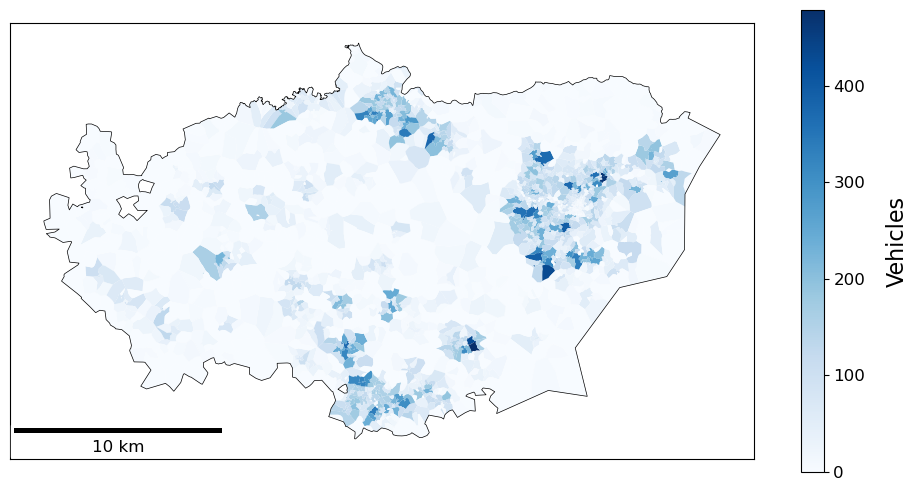

In [10]:
data_mapper.plot_mapped_data_mean(data_name='Vehicles')